<a href="https://colab.research.google.com/github/Darafarm/Darafarm/blob/main/malaria_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#  import zipfile
# with zipfile.ZipFile("/content/drive.google.com/drive/u/0/my-drive", 'r') as zip_ref:
#   zip_ref.extractall("/content/data")  # Extracts all files to the specified directory
#

from google.colab import drive
import zipfile

# Mount your Google Drive
drive.mount('/content/drive')

# Specify the path to your zip file on Google Drive
zip_path = "/content/drive/MyDrive/archive.zip"

# Extract the zip file to the specified directory
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
  zip_ref.extractall("/content/data")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import cv2
import numpy as np

def load_images_and_labels(main_path, target_shape=(224, 224)):
    X = []
    y = []
    images = []

    try:
        # Define label mapping based on folder names
        label_mapping = {'Parasitized': 1, 'Uninfected': 0}

        for folder in os.listdir(main_path):
            folder_path = os.path.join(main_path, folder)
            if not os.path.isdir(folder_path):
                print(f"Warning: Skipping {folder} as it is not a directory.")
                continue

            if folder not in label_mapping:
                print(f"Warning: Unknown folder name {folder}. Skipping.")
                continue

            label = label_mapping[folder]

            for image_file in os.listdir(folder_path):
                image_path = os.path.join(folder_path, image_file)

                image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
                if image is None:
                    print(f"Warning: Could not read image {image_path}. Skipping.")
                    continue

                image_resized = cv2.resize(image, target_shape)  # Resize image to a common shape
                X.append(image_resized)
                y.append(label)
                images.append(image_path)

    except Exception as e:
        print(f"Error occurred: {e}")

    # Convert lists to NumPy arrays for better performance
    X = np.array(X)
    y = np.array(y)

    return X, y, images

# Example usage:
main_path = "/content/data/cell_images"
X, y, images = load_images_and_labels(main_path)
if len(X) > 0 and len(y) > 0:
    print(f'Sample image shape:', X[0].shape, 'Label:', y[0])
    print(f'Sample image file:', images[0])
    print(f'Number of samples: {len(X)}')
    print(f'Number of labels: {len(y)}')

else:
    print("No images were loaded. Please check the directory structure and file paths.")


Sample image shape: (224, 224) Label: 0
Sample image file: /content/data/cell_images/Uninfected/C235ThinF_IMG_20151112_165055_cell_65.png
Number of samples: 27558
Number of labels: 27558


IMAGE VISUALIZATION

In [ ]:
import numpy as np

# Function to shuffle X and y
def shuffle_data(X, y):
    # Convert X and y to numpy arrays if they are not already
    X = np.array(X)
    y = np.array(y)

    # Generate a permutation of indices
    indices = np.random.permutation(len(X))

    # Shuffle X and y with the generated indices
    X_shuffled = X[indices]
    y_shuffled = y[indices]

    return X_shuffled, y_shuffled


X_shuffled, y_shuffled = shuffle_data(X, y)

# Display the first 10 shuffled samples to verify
for i in range(10):
    print(f'Shuffled image shape: {X_shuffled[i].shape}, Shuffled label: {y_shuffled[i]}')


Shuffled image shape: (224, 224), Shuffled label: 0
Shuffled image shape: (224, 224), Shuffled label: 1
Shuffled image shape: (224, 224), Shuffled label: 1
Shuffled image shape: (224, 224), Shuffled label: 0
Shuffled image shape: (224, 224), Shuffled label: 0
Shuffled image shape: (224, 224), Shuffled label: 0
Shuffled image shape: (224, 224), Shuffled label: 1
Shuffled image shape: (224, 224), Shuffled label: 0
Shuffled image shape: (224, 224), Shuffled label: 1
Shuffled image shape: (224, 224), Shuffled label: 1


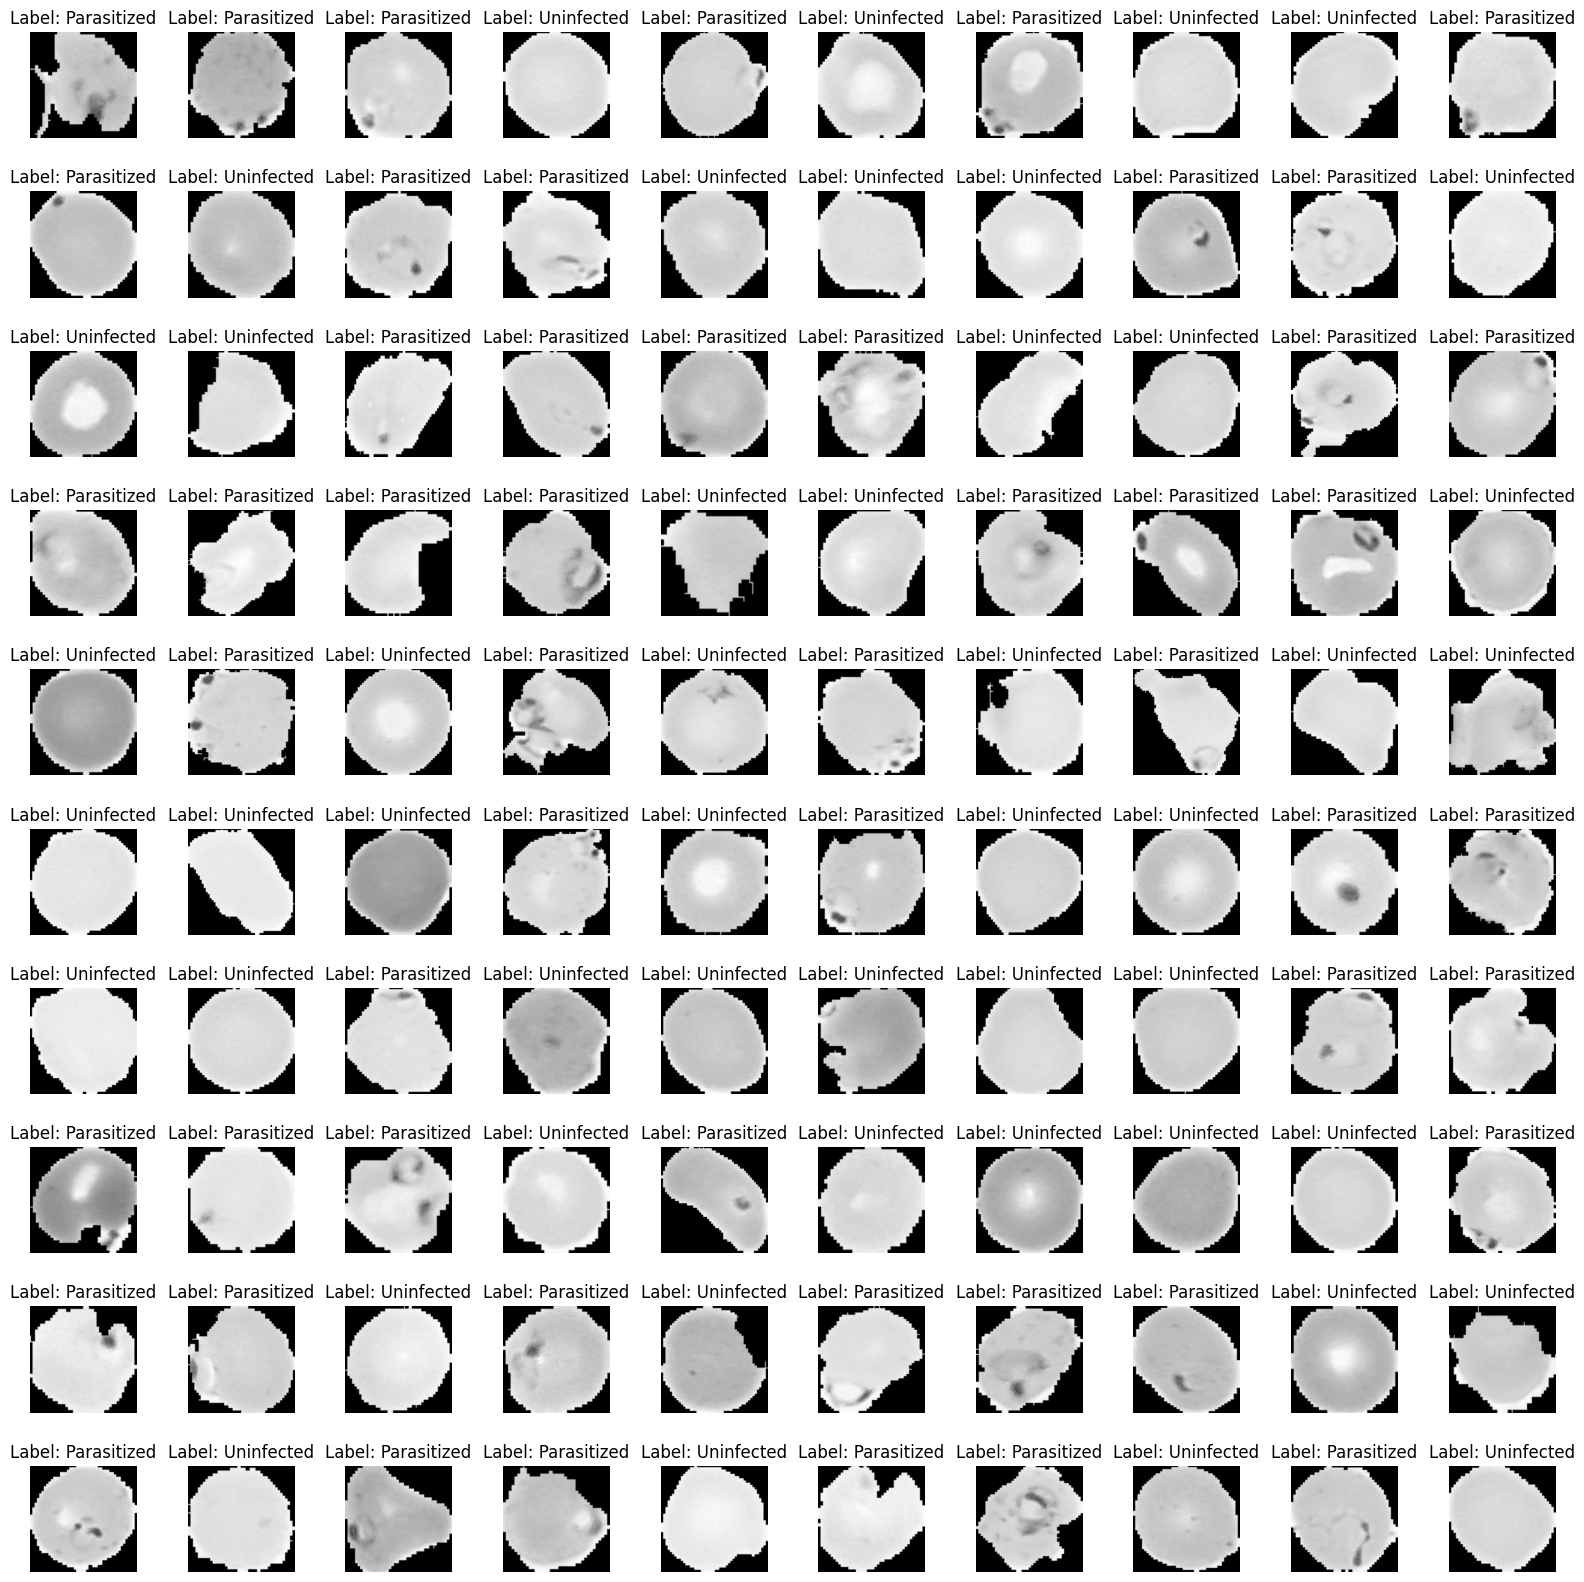

In [ ]:
import matplotlib.pyplot as plt

def display_images(X_shuffled, y_shuffled, num_images=100, images_per_row=10):
    if len(X_shuffled) == 0 or len(y_shuffled) == 0:
        print("No images to display.")
        return

    num_images = min(num_images, len(X_shuffled))
    num_rows = num_images // images_per_row + (1 if num_images % images_per_row else 0)
    fig, axes = plt.subplots(num_rows, images_per_row, figsize=(20, num_rows * 2))
    fig.subplots_adjust(hspace=0.5)

    for i in range(num_images):
        row = i // images_per_row
        col = i % images_per_row
        ax = axes[row, col] if num_rows > 1 else axes[col]
        ax.imshow(X_shuffled[i], cmap='gray')
        ax.set_title(f"Label: {'Parasitized' if y_shuffled[i] == 1 else 'Uninfected'}")
        ax.axis('off')

    # Hide any unused subplots
    for j in range(num_images, num_rows * images_per_row):
        row = j // images_per_row
        col = j % images_per_row
        ax = axes[row, col] if num_rows > 1 else axes[col]
        ax.axis('off')

    plt.show()

# Example usage:
display_images(X_shuffled, y_shuffled, num_images=100)

In [ ]:
print(X_shuffled[1])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


SPLITTING DATASET

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

# Assume X_shuffled and y_shuffled are predefined and contain the image data and labels

# Limit the dataset to 7000 samples
num_samples = 5000
X_shuffled = X_shuffled[:num_samples]
y_shuffled = y_shuffled[:num_samples]

# Normalize the image data
X_shuffled = X_shuffled / 255.0

# Ensure labels are binary (0 or 1)
y_shuffled = np.expand_dims(y_shuffled, axis=-1)

# Split data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_shuffled, y_shuffled, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Ensure the dataset has the correct shape
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

# Expand dimensions to match the CNN input shape (if necessary)
if X_train.ndim == 3:
    X_train = np.expand_dims(X_train, axis=-1)
if X_val.ndim == 3:
    X_val = np.expand_dims(X_val, axis=-1)
if X_test.ndim == 3:
    X_test = np.expand_dims(X_test, axis=-1)

# Confirm the dimensions after expansion
print("X_train shape after expansion:", X_train.shape)
print("X_val shape after expansion:", X_val.shape)
print("X_test shape after expansion:", X_test.shape)


X_train shape: (4000, 224, 224)
y_train shape: (4000, 1)
X_val shape: (500, 224, 224)
y_val shape: (500, 1)
X_test shape: (500, 224, 224)
y_test shape: (500, 1)
X_train shape after expansion: (4000, 224, 224, 1)
X_val shape after expansion: (500, 224, 224, 1)
X_test shape after expansion: (500, 224, 224, 1)


BUILDING UNET ARCHITECTURE

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input, Dropout, Multiply, Add, Activation, Lambda
from tensorflow.keras.models import Model

def attention_layer(x):
    att = Conv2D(1, (1, 1), activation='sigmoid')(x)
    return Multiply()([x, att])

def build_attention_cnn(input_shape):
    inputs = Input(shape=input_shape)

    x = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    x = MaxPooling2D((2, 2))(x)

    x = attention_layer(x)

    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2))(x)

    x = attention_layer(x)

    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    outputs = Dense(1, activation='sigmoid')(x)

    model = Model(inputs, outputs)
    return model

input_shape = X_train.shape[1:]
attention_cnn = build_attention_cnn(input_shape)
attention_cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
attention_cnn.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 1)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 224, 224, 32)         320       ['input_1[0][0]']             
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 112, 112, 32)         0         ['conv2d[0][0]']              
 D)                                                                                               
                                                                                                  
 conv2d_1 (Conv2D)           (None, 112, 112, 1)          33        ['max_pooling2d[0][0]']   

In [ ]:
X_train.shape[:]

(4000, 224, 224, 1)

# **Generative Adversarial Network**

In [ ]:
from tensorflow.keras.layers import Dense, Reshape, Conv2DTranspose, LeakyReLU
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# Define the generator
def build_generator(latent_dim):
    model = Sequential()
    model.add(Dense(256, input_dim=latent_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(1024))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(np.prod(input_shape), activation='tanh'))
    model.add(Reshape(input_shape))
    return model

# Define the discriminator
def build_discriminator(input_shape):
    model = Sequential()
    model.add(Conv2D(64, (3, 3), strides=(2, 2), padding='same', input_shape=input_shape))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.3))
    model.add(Conv2D(128, (3, 3), strides=(2, 2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.3))
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))
    return model

latent_dim = 100
generator = build_generator(latent_dim)
discriminator = build_discriminator(input_shape)
discriminator.compile(optimizer=Adam(0.0002, 0.5), loss='binary_crossentropy', metrics=['accuracy'])

# Combine the GAN
discriminator.trainable = False
gan_input = Input(shape=(latent_dim,))
gan_output = discriminator(generator(gan_input))
gan = Model(gan_input, gan_output)
gan.compile(optimizer=Adam(0.0002, 0.5), loss='binary_crossentropy')

gan.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 100)]             0         
                                                                 
 sequential (Sequential)     (None, 224, 224, 1)       52113152  
                                                                 
 sequential_1 (Sequential)   (None, 1)                 475905    
                                                                 
Total params: 52589057 (200.61 MB)
Trainable params: 52113152 (198.80 MB)
Non-trainable params: 475905 (1.82 MB)
_________________________________________________________________


In [ ]:
import matplotlib.pyplot as plt

def generate_real_samples(X, y, n_samples):
    idx = np.random.randint(0, X.shape[0], n_samples)
    X_real, y_real = X[idx], y[idx]
    return X_real, y_real

def generate_fake_samples(generator, latent_dim, n_samples):
    x_input = np.random.randn(latent_dim * n_samples)
    x_input = x_input.reshape(n_samples, latent_dim)
    X_fake = generator.predict(x_input)
    y_fake = np.zeros((n_samples, 1))
    return X_fake, y_fake

def train_gan(generator, discriminator, gan, X_train, latent_dim, epochs=10000, batch_size=64):
    for epoch in range(epochs):
        X_real, y_real = generate_real_samples(X_train, y_train, batch_size // 2)
        X_fake, y_fake = generate_fake_samples(generator, latent_dim, batch_size // 2)

        X, y = np.vstack((X_real, X_fake)), np.vstack((y_real, y_fake))
        d_loss, _ = discriminator.train_on_batch(X, y)

        x_gan = np.random.randn(latent_dim * batch_size).reshape(batch_size, latent_dim)
        y_gan = np.ones((batch_size, 1))
        g_loss = gan.train_on_batch(x_gan, y_gan)

        if (epoch + 1) % 1000 == 0:
            print(f"Epoch {epoch + 1}, Discriminator Loss: {d_loss}, Generator Loss: {g_loss}")

# Train GAN
train_gan(generator, discriminator, gan, X_train, latent_dim)


1/1 [==============================] - 0s 109ms/step


KeyboardInterrupt: 

In [ ]:
# Train the CNN with attention mechanisms
history = attention_cnn.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32)



Epoch 1/50
125/125 [==============================] - 473s 4s/step - loss: 0.7040 - accuracy: 0.5170 - val_loss: 0.6833 - val_accuracy: 0.5700
Epoch 2/50
125/125 [==============================] - 462s 4s/step - loss: 0.6702 - accuracy: 0.5950 - val_loss: 0.6629 - val_accuracy: 0.5980
Epoch 3/50
125/125 [==============================] - 468s 4s/step - loss: 0.6455 - accuracy: 0.6217 - val_loss: 0.6787 - val_accuracy: 0.5580
Epoch 4/50
125/125 [==============================] - 466s 4s/step - loss: 0.6036 - accuracy: 0.6860 - val_loss: 0.6783 - val_accuracy: 0.6060
Epoch 5/50
125/125 [==============================] - 457s 4s/step - loss: 0.5271 - accuracy: 0.7423 - val_loss: 0.7236 - val_accuracy: 0.6040
Epoch 6/50
125/125 [==============================] - 459s 4s/step - loss: 0.4362 - accuracy: 0.8012 - val_loss: 0.7886 - val_accuracy: 0.5800
Epoch 7/50
125/125 [==============================] - 462s 4s/step - loss: 0.3381 - accuracy: 0.8525 - val_loss: 0.9765 - val_accuracy: 0.6000

KeyboardInterrupt: 

In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = attention_cnn.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()


16/16 [==============================] - 16s 997ms/step - loss: 2.0428 - accuracy: 0.5920
Test accuracy: 0.5920000076293945


NameError: name 'history' is not defined